# Supervised Learning Project 1: Part 2

This project implements various regression models from scratch. For this section, I first fit models to the Boston Housing Dataset.

## Import Required Libraries

In [1]:
#Importing libraries    
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

## Boston Housing Dataset

### Load Dataset and Inspect a few rows

In [31]:
#Load and inspect the Boston housing dataset
dataframe = pd.read_csv("http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv")
attributes = list(dataframe.columns)
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


As we are performing linear regression and a bias term should be included, I attach a column of ones to the dataset. This is done using the below function. 

In [32]:
#Function to add ones to the training set as a way to account for the bias term in the weights
def add_bias(data):
  """ 
  Adds a column of ones into the dataset in order to account for the bias term. 
  
  Args
  ----
  data : a NumPy array of the input data. Can be a matrix of shape (m, n) or a single input vector x_i of shape (m, 1). m is the number of training examples
  while n is the number of input features.

  Returns
  -------
  data_with_bias : a NumPy array of data with 1s added. If data is a matrix, then a column os 1s is added to the first column. 
  If data is a single vector x_i, then the first element of x_i is 1.
  """

  #If the data is a vector
  if data.shape[1] == 1:
    #Create a one
    ones = np.ones((data.shape[1], ))
    #Insert 1 as the first value for the vector
    data_with_bias = np.insert(data, 0, ones, axis=0)

  #If data is a matrix
  else:
    #Create a vector ones
    ones = np.ones((data.shape[0], ))
    #Stack this vector of ones to the beginning of the matrix
    data_with_bias = np.insert(data, 0, ones, axis=1)

  return data_with_bias

In [33]:
#Convert the pandas dataframe into matrix
data = dataframe.values

#Add a column of 1's to the data matrix to account for bias term
data_with_bias = add_bias(data)

#Split the data matrix into a matrix of the inputs and the vector of outputs
X = data_with_bias[:, :13]
Y = data_with_bias[:, 13].reshape(-1, 1)

print("Size of dataset : {}".format(X.shape[0]))
print("Number of input features : {}\n".format(X.shape[1] - 1))
print("Shape of X (inputs with bias included) : {}".format(X.shape))
print("Shape of Y (targets): {}".format(Y.shape))

Size of dataset : 506
Number of input features : 12

Shape of X (inputs with bias included) : (506, 13)
Shape of Y (targets): (506, 1)


When training, it is important to split the entire dataset into a training and test set, where the test set is to evaluate the model's performance on new unseen data. The following function performs this split.

In [34]:
def split_data(inputs, targets, test_proportion, shuffle=None):
  """
  Splits the data into training and test sets.

  Args
  ----
  inputs : NumPy array of input data. Should be of shape (# examples, # features)
  targets : NumPy array of target data. Should be of shape (# examples, 1)
  test_proportion : Value between 0 and 1 which specifies how much of the data to use for testing.
  shuffle : Optional. Set to True if you want the data shuffled and then split.
  seed : Optional. Set for reproducible results.

  Returns
  -------
  train_X : NumPy array of training examples. Should be of shape (# examples, # features)
  train_Y : NumPy array of training targets. Should be of shape (# examples, 1)
  test_X : NumPy array of testing examples. Should be of shape (# examples, # features)
  test_Y : NumPy array of testing targets. Should be of shape (# examples, 1)
  """
  
  #Stores the number of data points
  nData = inputs.shape[0]

  # Shuffle data
  if shuffle:
    #Generate a shuffled version of the array indices
    shuffled_indices = np.random.permutation(nData)
    #Shuffle the inputs as per in the array of shuffled indices
    shuffled_inputs = inputs[shuffled_indices, :]
    shuffled_targets = targets[shuffled_indices, :]
  else:
    #If shuffle is set to False then we just work with the data in its original order
    shuffled_inputs = inputs
    shuffled_targets = targets

  # Calculate the split index based on the specified proportions
  split_index = int((1 - test_proportion) * nData)

  # Select the examples up to the split index to be used as training set
  train_X = shuffled_inputs[:split_index]
  train_Y = shuffled_targets[:split_index]
  # Select the examples from the split index onwards to be used as the test set
  test_X = shuffled_inputs[split_index:]
  test_Y = shuffled_targets[split_index:]

  return train_X, train_Y, test_X, test_Y

## Experimenting with different variants of Linear Regression

I now perform experiments with different regression models on the dataset. Note that I do for a single run i.e just a single train-test split and then for 20 runs where on each run, I work with a new random train-test split.

### Performing Naive Regression

Naive regression is defined to be regression where no features are provided, just the column of ones. This helps us understand how the model would predict if it was provided no relevant information.

#### Single Run

This was just to test over a single run. As we are meant to perform regression over 20 runs, please skip to 20 runs implementation that comes next.

In [35]:
#Split the data into training and test sets. For reproducibility of results I've set a seed
np.random.seed(100000)
X_train, Y_train, X_test, Y_test = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)

print("Train X shape = {}".format(X_train.shape))
print("Train Y shape = {}".format(Y_train.shape))
print("Test X shape = {}".format(X_test.shape))
print("Test Y shape = {}".format(Y_test.shape))

Train X shape = (337, 13)
Train Y shape = (337, 1)
Test X shape = (169, 13)
Test Y shape = (169, 1)


In [36]:
#Create vector of ones for training and test set
train_ones = np.ones((X_train.shape[0], 1))
test_ones = np.ones((X_test.shape[0], 1))

#Perform Naive regression on training set
w_naive = np.linalg.inv(train_ones.T @ train_ones) @ train_ones.T @ Y_train

#Calculate train MSE and test MSE
train_error = MSE(train_ones, Y_train, w_naive)
test_error = MSE(test_ones, Y_test, w_naive)

#The w_naive values is pretty much the same as the mean of the training output values. I have confirmed this by printing the mean of the
#Y_train.
print("w_naive value = {}".format(w_naive))
print("Mean of Y_train values = {}".format(np.mean(Y_train)), '\n')
print("Train MSE: {}".format(train_error.item()))
print("Test MSE: {}".format(test_error.item()))

w_naive value = [[23.11780415]]
Mean of Y_train values = 23.11780415430267 

Train MSE: 88.34864443642192
Test MSE: 77.60927103774101


#### 20 runs

In [37]:
#For reproducibility of results
np.random.seed(101010)

#Stores the number of runs
runs = 20

#These will store the total train and test MSE over the 20 runs
train_MSE = 0
test_MSE = 0

#Iterate over runs
for i in range(runs):

  #Generate samples
  xtrain, ytrain, xtest, ytest = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)

  train_ones = np.ones((xtrain.shape[0], 1))
  test_ones = np.ones((xtest.shape[0], 1))

  #Perform Naive Regression
  w_naive = np.linalg.inv(train_ones.T @ train_ones) @ train_ones.T @ ytrain

  #Calculate and aggregate train and test MSE
  train_MSE += MSE(train_ones, ytrain, w_naive) 
  test_MSE += MSE(test_ones, ytest, w_naive)

  print(">> Run {} Completed.".format(i+1))

print("Average Train MSE (Computed over {} runs) = {}".format(runs, train_MSE.item()/runs))
print("Average Test MSE (Computed over {} runs) = {}".format(runs, test_MSE.item()/runs))

>> Run 1 Completed.
>> Run 2 Completed.
>> Run 3 Completed.
>> Run 4 Completed.
>> Run 5 Completed.
>> Run 6 Completed.
>> Run 7 Completed.
>> Run 8 Completed.
>> Run 9 Completed.
>> Run 10 Completed.
>> Run 11 Completed.
>> Run 12 Completed.
>> Run 13 Completed.
>> Run 14 Completed.
>> Run 15 Completed.
>> Run 16 Completed.
>> Run 17 Completed.
>> Run 18 Completed.
>> Run 19 Completed.
>> Run 20 Completed.
Average Train MSE (Computed over 20 runs) = 86.05624289198637
Average Test MSE (Computed over 20 runs) = 81.51650453132757


### Linear Regression with single attributes

Here I perform linear regression with just a single attribute.

#### Single run

In [38]:
#Split the data into training and test sets. For reproducibility of results I've set a seed
np.random.seed(100000)
X_train, Y_train, X_test, Y_test = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)

print("Train X shape = {}".format(X_train.shape))
print("Train Y shape = {}".format(Y_train.shape))
print("Test X shape = {}".format(X_test.shape))
print("Test Y shape = {}".format(Y_test.shape))

Train X shape = (337, 13)
Train Y shape = (337, 1)
Test X shape = (169, 13)
Test Y shape = (169, 1)


Attribute 1
>> Train MSE = 75.38255401288508
>> Test MSE = 66.78293431124388
Attribute 2
>> Train MSE = 75.51172905050203
>> Test MSE = 70.33972075418993
Attribute 3
>> Train MSE = 68.0409491545197
>> Test MSE = 58.395264577122326
Attribute 4
>> Train MSE = 85.60787760691655
>> Test MSE = 75.34132353942809
Attribute 5
>> Train MSE = 71.66139176053096
>> Test MSE = 64.49896359551549
Attribute 6
>> Train MSE = 40.254436719820276
>> Test MSE = 51.44168304965881
Attribute 7
>> Train MSE = 75.04999740386921
>> Test MSE = 67.85949862132253
Attribute 8
>> Train MSE = 83.50456385970857
>> Test MSE = 71.1807214457734
Attribute 9
>> Train MSE = 75.82690880210019
>> Test MSE = 65.26275698437892
Attribute 10
>> Train MSE = 70.12419077550405
>> Test MSE = 57.7991630121233
Attribute 11
>> Train MSE = 66.21306809267752
>> Test MSE = 56.30832887000016
Attribute 12
>> Train MSE = 39.369332348721535
>> Test MSE = 37.20489629767409


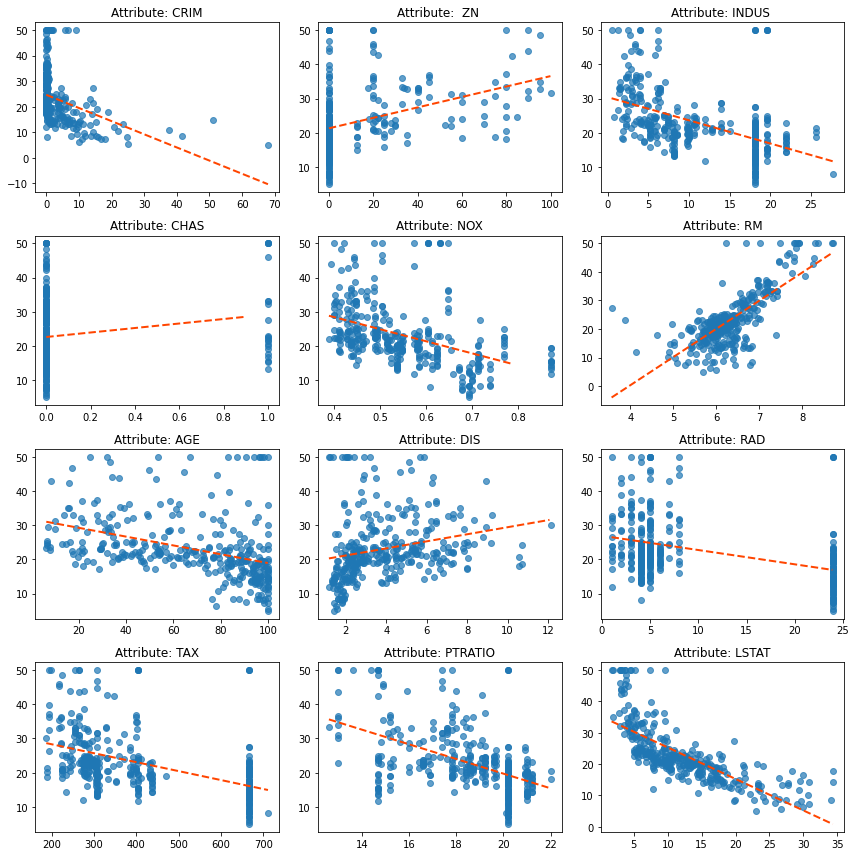

In [39]:
#Defines the number of features in the dataset, excluding the 1s column
num_features = X.shape[1] - 1

plt.figure(figsize=(12, 12))

#Iterate over all features
for i in range(num_features):

  print("Attribute {}".format(i+1))

  #Pick out a the specific feature and the bias column
  X_train_subset = X_train[:, [0, i+1]]
  X_test_subset = X_test[:, [0, i+1]]

  #Checkpoint to make sure the dimensions are correct 
  assert X_train_subset.shape == (X_train.shape[0], 2)

  #Computed least squares solution - In case we encounter singular matrices, I have used the pseudoinverse as backup
  try:
    w = np.linalg.inv(X_train_subset.T @ X_train_subset) @ X_train_subset.T @ Y_train
  except np.linalg.LinAlgError:
    w = np.linalg.pinv(X_train_subset.T @ X_train_subset) @ X_train_subset.T @ Y_train

  #Calculate the train and test MSE for that particular feature/attribute
  train_MSE = MSE(X_train_subset, Y_train, w).item() 
  test_MSE = MSE(X_test_subset, Y_test, w).item()

  print(">> Train MSE = {}".format(train_MSE))
  print(">> Test MSE = {}".format(test_MSE))

  #Define the predicted line of best fit over the data points
  x_points = np.arange(np.min(X_train[:, i+1]), np.max(X_train[:, i+1]), 0.1).reshape(-1, 1)
  y_points = w.squeeze()[1]*x_points + w.squeeze()[0]

  #Plot the data and regression line for each feature, just to see how the model has trained
  plt.subplot(4,3, i+1)
  plt.scatter(X_train[:, i+1], Y_train, alpha=0.7)
  plt.plot(x_points, y_points, color='orangered', linestyle='--', linewidth=2)
  plt.title("Attribute: {}".format(attributes[i]))

plt.tight_layout()
plt.show()

#### 20 runs

In [40]:
#For ensuring reproducible results
np.random.seed(199134)

#Stores the number of runs
runs = 20

#Defines the number of features in the dataset, excluding the 1s column
num_features = X.shape[1] - 1

#Initialize empty dictionary
errors_log = dict()

#Iterate over runs
for run in range(runs):

  print("Run {}".format(run+1))

  #Generate a fresh train and test set
  xtrain, ytrain, xtest, ytest = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)

  #Iterate over the features
  for i in range(num_features):
    #Create a key for the attribute
    key = "Attribute {}".format(i+1)

    #Create the key in errors dictionary if it doesn't exist
    if not key in errors_log.keys():
      errors_log[key] = {"Train MSE":[], "Test MSE":[]}

    #Pick out a the specific feature and the bias column
    xtrain_subset = xtrain[:, [0, i+1]]
    xtest_subset = xtest[:, [0, i+1]]

    #Checkpoint to make sure the dimensions are correct 
    assert xtrain_subset.shape == (xtrain.shape[0], 2)

    #Computed least squares solution - In case we encounter singular matrices, I have used the pseudoinverse as backup
    try:
      w = np.linalg.inv(xtrain_subset.T @ xtrain_subset) @ xtrain_subset.T @ ytrain
    except np.linalg.LinAlgError:
      w = np.linalg.pinv(xtrain_subset.T @ xtrain_subset) @ xtrain_subset.T @ ytrain

    # Calculate the train and test MSE and add it into the errors log
    errors_log[key]["Train MSE"].append(MSE(xtrain_subset, ytrain, w).item())
    errors_log[key]["Test MSE"].append(MSE(xtest_subset, ytest, w).item())

    print(">> Linear regression for {} completed.".format(key))

Run 1
>> Linear regression for Attribute 1 completed.
>> Linear regression for Attribute 2 completed.
>> Linear regression for Attribute 3 completed.
>> Linear regression for Attribute 4 completed.
>> Linear regression for Attribute 5 completed.
>> Linear regression for Attribute 6 completed.
>> Linear regression for Attribute 7 completed.
>> Linear regression for Attribute 8 completed.
>> Linear regression for Attribute 9 completed.
>> Linear regression for Attribute 10 completed.
>> Linear regression for Attribute 11 completed.
>> Linear regression for Attribute 12 completed.
Run 2
>> Linear regression for Attribute 1 completed.
>> Linear regression for Attribute 2 completed.
>> Linear regression for Attribute 3 completed.
>> Linear regression for Attribute 4 completed.
>> Linear regression for Attribute 5 completed.
>> Linear regression for Attribute 6 completed.
>> Linear regression for Attribute 7 completed.
>> Linear regression for Attribute 8 completed.
>> Linear regression for 

Below are the errors on training and test set for each sub-model using a single attribute.

In [41]:
#Process the raw errors data dictionary into a clean table with the train and test MSE results for each attribute 
averaged_errors = {"Method": errors_log.keys(),
                   "MSE Train": [np.mean(errors_log[key]["Train MSE"]) for key in errors_log.keys()],
                   "MSE Test": [np.mean(errors_log[key]["Test MSE"]) for key in errors_log.keys()]}

results_table = pd.DataFrame.from_dict(averaged_errors)
results_table

,Method,MSE Train,MSE Test
0,Attribute 1,69.568609,77.953024
1,Attribute 2,72.015690,76.825691
2,Attribute 3,62.422693,69.677222
3,Attribute 4,80.442598,85.280471
4,Attribute 5,67.203539,73.004103
5,Attribute 6,42.845189,45.544419
6,Attribute 7,70.498032,76.720579
7,Attribute 8,77.077643,83.831789
8,Attribute 9,70.034179,76.850144
9,Attribute 10,63.711957,70.728458


### Linear Regression with all attributes

Here, essentially multiple regression is performed using all attributes.

#### Single run

In [42]:
#Split the data into training and test sets. For reproducibility of results I've set a seed
np.random.seed(100000)
X_train, Y_train, X_test, Y_test = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)

print("Train X shape = {}".format(X_train.shape))
print("Train Y shape = {}".format(Y_train.shape))
print("Test X shape = {}".format(X_test.shape))
print("Test Y shape = {}".format(Y_test.shape))

Train X shape = (337, 13)
Train Y shape = (337, 1)
Test X shape = (169, 13)
Test Y shape = (169, 1)


In [43]:
#Linear regression over all attributes - In case we encounter singular matrices, I've included the pseudoinverse as backup
try:
  W = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
except np.linalg.LinAlgError:
  W = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ Y_train

#Compute training and test error
train_error = MSE(X_train, Y_train, W) 
test_error = MSE(X_test, Y_test, W)

print("Training MSE = {}".format(train_error.item()))
print("Testing MSE = {}".format(test_error.item()))

Training MSE = 19.968355874885134
Testing MSE = 29.34833757420169


#### 20 runs

In [44]:
#For reproducibility of results
np.random.seed(10001001)

#Define number of runs
runs = 20

#This will store the total train and test MSE over 20 runs, which we will average later
train_MSE = 0
test_MSE = 0

for i in range(runs):
  #Generate fresh train and test sets
  xtrain, ytrain, xtest, ytest = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)

  #Compute weights using least squares regression- In case we encounter singular matrices, I've used the pseudoinverse as backup
  try:
    W = np.linalg.inv(xtrain.T @ xtrain) @ xtrain.T @ ytrain
  except np.linalg.LinAlgError:
    W = np.linalg.pinv(xtrain.T @ xtrain) @ ytrain.T @ ytrain

  #Checkpoint to ensure the weight dimensions are correct
  assert W.shape == (xtrain.shape[1], 1)

  #Compute train and test error
  train_MSE += MSE(xtrain, ytrain, W)
  test_MSE += MSE(xtest, ytest, W)

  print(">> Run {} Completed.".format(i+1))

print("Average Train MSE (Computed over {} runs) = {}".format(runs, train_MSE.item()/runs))
print("Average Test MSE (Computed over {} runs) = {}".format(runs, test_MSE.item()/runs))

>> Run 1 Completed.
>> Run 2 Completed.
>> Run 3 Completed.
>> Run 4 Completed.
>> Run 5 Completed.
>> Run 6 Completed.
>> Run 7 Completed.
>> Run 8 Completed.
>> Run 9 Completed.
>> Run 10 Completed.
>> Run 11 Completed.
>> Run 12 Completed.
>> Run 13 Completed.
>> Run 14 Completed.
>> Run 15 Completed.
>> Run 16 Completed.
>> Run 17 Completed.
>> Run 18 Completed.
>> Run 19 Completed.
>> Run 20 Completed.
Average Train MSE (Computed over 20 runs) = 21.414764727427052
Average Test MSE (Computed over 20 runs) = 25.922665880997403


## Kernelized Ridge Regression

Now I implement Kernelized Ridge Regression model on the dataset. Kernels are used to map data to higher dimensional spaces, allowing us to now train complex non-linear functions. The kernel used here is a gaussian kernel of the form

$$K(p, q) = \exp{-\frac{\parallel p - q \parallel^2}{2\sigma^2}} $$

In order to make computations efficient I instead pre-compute a kernel matrix $\mathbf{K}$ where each position $\mathbf{K}_{ij}$ is the kernel function $K(i, j)$. The following code implements the kernel matrix computation.

In [45]:
def gaussian_kernel_matrix(X, sigma):
  """
  Computes the gaussian kernel matrix on a given set of vectors.
  
  Args
  ----
  X : NumPy array of data. Should be of shape (l, n) where l is number of examples and n is number of features
  sigma : sigma value of Gaussian kernel.

  Returns
  -------
  K : a symmetric positive definite matrix of shape (l, l)
  """

  #Number of samples
  l = X.shape[0]

  # Extract the diagonals of XX^T into a vector and stack it l times into lxl matrix B
  inner_product_vector = np.diagonal(X@X.T).reshape(-1, 1)

  #Compute matrix of just the dot products between x_i and x_j
  inner_product_matrix = inner_product_vector - 2 * (X@X.T) + inner_product_vector.T

  #Compute gaussian kernel matrix
  K = np.exp((-1/(2*sigma**2)) * inner_product_matrix)

  #Checkpoint to ensure matrix K is correct dimensions
  assert K.shape == (l, l), "K matrix should be of shape ({}, {})".format(l, l)

  return K

In [46]:
def kernel_ridge_regression(X, y, sigma, gamma):
  """ 
  Compute the solution alpha* for kernelized ridge regression.

  Args
  ----
  X : NumPy array of data. Should be of shape (l, n) where l is number of examples and n is number of input features
  y : NumPy array of target outputs. Should be of shape (l, 1)
  sigma : sigma value for Gaussian kernel
  gamma : regularization parameter for ridge regression

  Returns
  -------
  alpha_star : (l, 1) vector which represents the dual solution for ridge regression.
  
  """

  #Extract number of samples
  l = X.shape[0]

  #Compute kernel
  K = gaussian_kernel_matrix(X, sigma) #kernel_matrix(X, X, sigma=sigma)

  #Create identity matrix used in the formula
  I = np.eye(l)

  #Compute alpha_star value using formula
  try:
    alpha_star = np.linalg.inv(K + gamma*l*I) @ y
  except np.linalg.LinAlgError:
    alpha_star = np.linalg.pinv(K + gamma*l*I) @ y

  #Checkpoint to ensure the alpha is correct dimensions
  assert alpha_star.shape == (l, 1), "Alpha star should be of shape ({}, {})".format(l, 1)

  return alpha_star

In [47]:
def evaluate(alpha, X_tr, X_te, sigma):
  """
  Vectorized implementation of kernel ridge regression evaluation function on a test point.

  Args
  ----
  alpha : NumPy array of the dual solution alpha. Should be of shape (l, 1) where l is the number of training examples.
  X_tr : NumPy array of the training set inputs. Should be of shape (l, n)
  X_te : NumPy array of the test set inputs. Should be of shape (m, n) where m is number of test examples.
  sigma : Sigma value of the Gaussian kernel.

  Returns
  -------
  pred : NumPy array of predictions for the test data. Should be of shape (m, 1)
  """

  #Extract dimensions of data
  l = X_tr.shape[0]
  m = X_te.shape[0]

  #Evaluate regression model at all test points
  inner_product_matrix = np.diagonal(X_tr@X_tr.T).reshape(1, -1) - 2 * (X_te @ X_tr.T) + np.diagonal(X_te@X_te.T).reshape(-1, 1) 
  K = np.exp((-1/(2*sigma**2)) * inner_product_matrix)
  pred = K @ alpha

  assert pred.shape == (m, 1), "Predictions should be of shape ({}, 1)".format(m, 1)

  return pred

### Selecting KRR parameters using K-fold Cross Validation

In kernel ridge regression, two hyperparameters are the $\sigma$ for the Gaussian kernel and $\gamma$, a regularizing parameter. The optimal values for these can be found by selecting a range for both and performing 5-fold cross validation. The below code implements this.

In [48]:
def train_with_kfoldCV(k, data, kernel_params, shuffle=True, verbose=True):
  """
  Performs k-fold cross validation on a given dataset.

  Args
  ----
  k - number of folds of cross-validation
  data - tuple of training input and output data. Training input must be NumPy array of shape (# examples, # features) while output must be of shape (# examples, 1)
  kernel_params - tuple of (sigma, gamma) parameters for computing the Gaussian kernel.
  shuffle - If True, then data is shuffled
  seed - to ensure reproducible results
  verbose - Set to True if you wish to see printed notifications.

  Returns
  -------
  cv_error - the validation set error averaged over the k folds of cross validation for the specified kernel parameters
  """

  #Extract data
  x, y = data

  #Extract gaussian kernel params
  sigma, gamma = kernel_params

  #Extract dimensions
  nSamples, nFeatures = x.shape

  #Shuffle dataset randomly
  if shuffle:
    perm = np.random.permutation(nSamples)
    x_shuffled = x[perm, :]
    y_shuffled = y[perm, :]
  else:
    x_shuffled = x
    y_shuffled = y

  # print("X_shuffled = ", x_shuffled)

  #Split data into k-groups
  x_groups = np.array_split(x_shuffled, k)
  y_groups = np.array_split(y_shuffled, k)

  #Stores the cross validation MSE which is the MSE calculated over the validation sets generated during each fold of k-fold CV
  cv_mse = 0

  #Iterate over each cross-validation group
  for i in range(len(x_groups)):

    #Use the selected group as "validation" set
    val_inputs, val_outputs = x_groups[i], y_groups[i]

    #Use rest of groups as training set
    train_inputs = np.vstack([x_groups[j] for j in range(len(x_groups)) if j != i]) 
    train_outputs = np.vstack([y_groups[j] for j in range(len(x_groups)) if j != i])
    
    #Fit model on train set
    alpha_star = kernel_ridge_regression(X=train_inputs, y=train_outputs, sigma=sigma, gamma=gamma)

    #Generate predictions on "validation" set
    val_predictions = evaluate(alpha=alpha_star, X_tr=train_inputs, X_te=val_inputs, sigma=sigma)

    #Compute validation errors
    cv_mse += (1/len(val_outputs)) * (val_outputs - val_predictions).T @ (val_outputs - val_predictions)
    if verbose:
      print(">> Cross-validation Fold {} Completed.".format(i+1))

  #Average the errors
  cv_error = cv_mse.item() / k

  if verbose:
    print(">> MEAN CROSS-VALIDATION ERROR = {}\n".format(cv_error))

  #Summarize performance using sample of model eval scores
  return cv_error

I select the parameter range for $\sigma$ and $\gamma$ as $\{2^7, 2^{7.5}, ..., 2^{13}\}$ and $\{2^{-40}, 2^{-39}, ..., 2^{-25}\}$ respectively. Cross validation over these parameters is performed below.

In [49]:
#Create parameter space
sigma_values = 2**np.arange(7, 13.5, 0.5)
gamma_values = (2**np.arange(40.0, 25.0, -1))**-1

#Represent all (sigma, gamma) pairs using meshgrid. This will be helpful when creating the 3D plot
gamma_array, sigma_array = np.meshgrid(gamma_values, sigma_values)

#This grid will store the cross validation error values
errors = np.zeros((sigma_values.shape[0], gamma_values.shape[0]))

#Split data into train and test set - for reproducibility, I've set a seed
np.random.seed(100000)
X_train, Y_train, X_test, Y_test = split_data(inputs=X[:, 1:], targets=Y, test_proportion=1/3, shuffle=True)
train_data = (X_train, Y_train)

print("Train X shape = {}".format(X_train.shape))
print("Train Y shape = {}".format(Y_train.shape))
print("Test X shape = {}".format(X_test.shape))
print("Test Y shape = {}".format(Y_test.shape))

Train X shape = (337, 12)
Train Y shape = (337, 1)
Test X shape = (169, 12)
Test Y shape = (169, 1)


In [50]:
#Train the model for all the different values of sigma and gamma
for i in range(errors.shape[0]):
  for j in range(errors.shape[1]):

    #Create the sigma and gamma pair
    sigma = sigma_values[i]
    gamma = gamma_values[j]

    print("Sigma = {}, Gamma = {}".format(sigma, gamma))

    #Perform 5-fold cross validation. Note - Because we are adding a shuffle operation inside crossval function, every pair of sigma and gamma may train on different examples
    #To ensure that each (sigma, gamma) pair is used on the same set of training and test examples on each fold, I've seed a seed
    np.random.seed(130399)
    cv_error = train_with_kfoldCV(k=5, data=train_data, kernel_params=(sigma, gamma), shuffle=True, verbose=True)
    
    #Add this error value into our errors matrix
    errors[i, j] = cv_error

print("Ridge Regression Completed!")

Sigma = 128.0, Gamma = 9.094947017729282e-13
>> Cross-validation Fold 1 Completed.
>> Cross-validation Fold 2 Completed.
>> Cross-validation Fold 3 Completed.
>> Cross-validation Fold 4 Completed.
>> Cross-validation Fold 5 Completed.
>> MEAN CROSS-VALIDATION ERROR = 1140.1129947412096

Sigma = 128.0, Gamma = 1.8189894035458565e-12
>> Cross-validation Fold 1 Completed.
>> Cross-validation Fold 2 Completed.
>> Cross-validation Fold 3 Completed.
>> Cross-validation Fold 4 Completed.
>> Cross-validation Fold 5 Completed.
>> MEAN CROSS-VALIDATION ERROR = 1027.3711938960896

Sigma = 128.0, Gamma = 3.637978807091713e-12
>> Cross-validation Fold 1 Completed.
>> Cross-validation Fold 2 Completed.
>> Cross-validation Fold 3 Completed.
>> Cross-validation Fold 4 Completed.
>> Cross-validation Fold 5 Completed.
>> MEAN CROSS-VALIDATION ERROR = 866.3310852646434

Sigma = 128.0, Gamma = 7.275957614183426e-12
>> Cross-validation Fold 1 Completed.
>> Cross-validation Fold 2 Completed.
>> Cross-valida

### Plot Cross Validation Error over $\sigma$ and $\gamma$ values

The optimal $\sigma$ and $\gamma$ parameters are chosen based on whether they produced the smallest cross validation error. In the following code, I plot the errors over the hyperparameter space as a 3D plot.

In [51]:
#Import 3D plotting tools
from mpl_toolkits import mplot3d

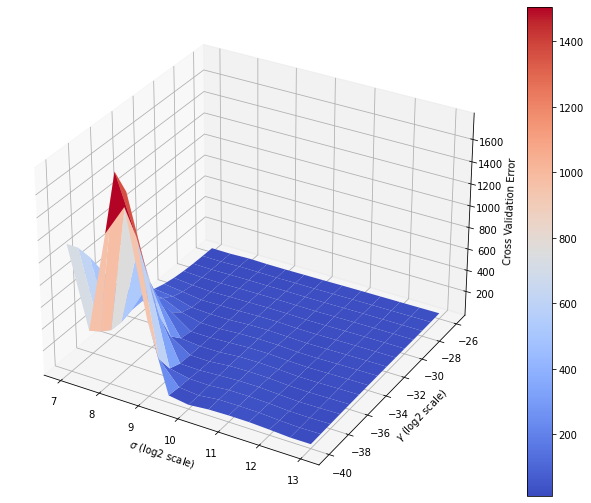

In [69]:
fig = plt.figure(figsize=(11, 9))
ax = plt.axes(projection='3d')

#Data for 3d graph
x_values = np.ravel(np.log2(sigma_array))
y_values = np.ravel(np.log2(gamma_array))
z_values = np.ravel(errors)

#Plot cv error
ax.set_xlabel("$\sigma$ (log2 scale)")
ax.set_ylabel("$\gamma$ (log2 scale)")
ax.set_zlabel("Cross Validation Error")
# ax.scatter3D(x_values, y_values, z_values)
p = ax.plot_surface(np.log2(sigma_array), np.log2(gamma_array), errors, cmap=plt.cm.coolwarm)
fig.colorbar(p)
plt.savefig('cross_val_error.png')

#### Plot as Annotated Heatmap

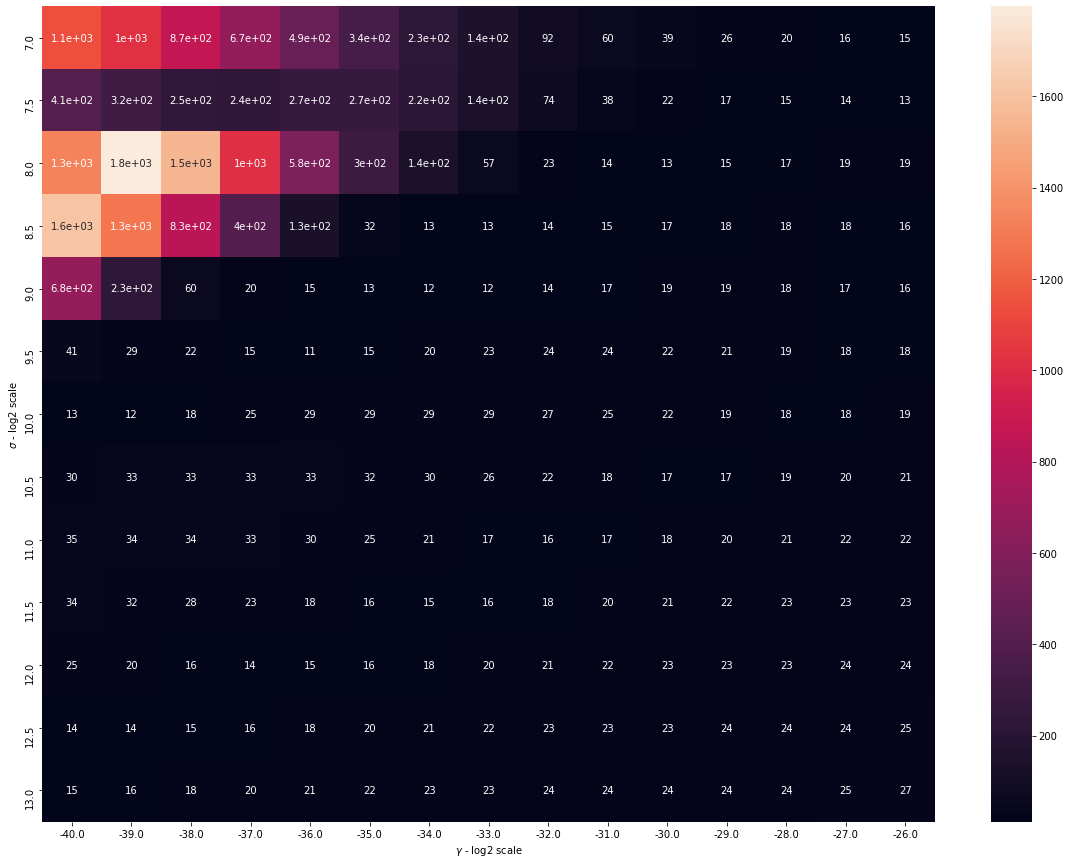

In [53]:
#Plot as annotated heatmap
plt.figure(figsize=(20, 15))
ax = sns.heatmap(errors, xticklabels=np.log2(gamma_values), yticklabels=np.log2(sigma_values), annot=True)
plt.ylabel("$\sigma$ - log2 scale")
plt.xlabel("$\gamma$ - log2 scale")
plt.savefig("annotated_heatmap.png")

### Calculate MSE on training and test sets for best $\gamma$ and $\sigma$

The best $\sigma$ and $\gamma$ are presented below. Using these values, I train on the full training set and evaluate using the test set.

In [54]:
smallest_error = np.argmin(errors)
best_sigma = np.ravel(sigma_array)[smallest_error]
best_gamma = np.ravel(gamma_array)[smallest_error]
print("Best gamma value = {}".format(best_gamma))
print("Best sigma value = {}".format(best_sigma))

Best gamma value = 1.4551915228366852e-11
Best sigma value = 724.0773439350247


In [56]:
#Perform ridge regression on training set using best sigma and gamma
alpha = kernel_ridge_regression(X=X_train, y=Y_train, sigma=best_sigma, gamma=best_gamma)

#Compute predictions on train set: The "test" points here are just the training set again
Y_train_pred = evaluate(alpha=alpha, X_tr=X_train, X_te=X_train, sigma=best_sigma) 
#Compute predictions on test set
Y_test_pred = evaluate(alpha=alpha, X_tr=X_train, X_te=X_test, sigma=best_sigma)

#Compute MSE for train and test sets
MSE_train = (1/len(Y_train)) * ((Y_train_pred - Y_train).T @ (Y_train_pred - Y_train)).item()
MSE_test = (1/len(Y_test)) * ((Y_test_pred - Y_test).T @ (Y_test_pred - Y_test)).item()

print("Train MSE on best gamma and sigma = {}".format(MSE_train))
print("Test MSE on best gamma and sigma = {}".format(MSE_test))

Train MSE on best gamma and sigma = 5.035037875678537
Test MSE on best gamma and sigma = 16.47934854432636


## Perform 20 runs of Kernel Ridge Regression 

The entire training routine performed previously is now repeated for 20 runs. This is done to smoothen our results out by averaging on 20 different train-test splits.

In [57]:
def naive_regression_eval(num_train_samples, num_test_samples, train_y, test_y, results_dict):
  """ 
  Performs Naive Regression on given data and saves results.
  
  Args
  ----
  num_train_samples : number of training samples. This will be used to create a ones vector for the training set.
  num_test_samples : number of testing samples. This will be used to create a ones vector for the testing set.
  train_y : NumPy array of training output values. Should be of shape (num_train_samples, 1)
  test_y : NumPy array of testing output values. Should be of shape (num_test_samples, 1)
  results_dict : Dictionary in which to save the results.

  Returns
  -------
  None.

  """

  #Add the key into the results dictionary
  key = "Naive Regression"
  if not key in results_dict.keys():
    results_dict[key] = {"Train MSE":[], "Test MSE": []}

  #Create a ones vector for train and test data
  train_ones = np.ones((num_train_samples, 1))
  test_ones = np.ones((num_test_samples, 1))

  #Compute the weights using training set - in case we encounter singular matrices, Ive added the psuedoinverse as backup
  try:
    w = np.linalg.inv(train_ones.T @ train_ones) @ train_ones.T @ train_y
  except np.linalg.LinAlgError:
    w = np.linalg.pinv(train_ones.T @ train_ones) @ train_ones.T @ train_y

  #Add results into the dictionary
  results_dict[key]["Train MSE"].append(MSE(train_ones, train_y, w).item())
  results_dict[key]["Test MSE"].append(MSE(test_ones, test_y, w).item())

  print(">> Naive Regression done.")

In [58]:
def linear_regression_eval(train_x, test_x, train_y, test_y, results_dict, single=False):
  """
  Performs linear regression on the given data and saves results.

  Args
  ----
  train_x : NumPy array of training inputs. Should be of shape (m, n) where m is number of training examples and n is number of input features
  test_x : NumPy array of test inputs. Should be of shape (l, n) where l is number of testing examples and n is number of input features
  train_y : NumPy array of training outputs. Should be of shape (m, 1) where m is number of training examples
  test_y : NumPy array of testing inputs. Should be of shape (l, 1) where l is number of training examples
  results_dict : Dictionary in which to save the results.
  single : Set to True if you wish to perform on single attributes.

  Returns
  -------
  None.
  """

  if single:
    num_features = train_x.shape[1] - 1

    #Iterate over the features
    for i in range(num_features):
      #Create a key for the attribute and add it into the results dictionary if it doesn't exist
      key = "attribute {}".format(i+1)
      if not key in results_dict.keys():
        results_dict[key] = {"Train MSE": [], "Test MSE": []}

      #Pick out a the specific feature and the bias column
      train_x_subset = train_x[:, [0, i+1]]
      test_x_subset = test_x[:, [0, i+1]]

      #Checkpoint to make sure the dimensions are correct 
      assert train_x_subset.shape == (train_x.shape[0], 2)

      #Computed least squares solution - In case we encounter singular matrices, I have used the pseudoinverse as backup
      try:
        w = np.linalg.inv(train_x_subset.T @ train_x_subset) @ train_x_subset.T @ train_y
      except np.linalg.LinAlgError:
        w = np.linalg.pinv(train_x_subset.T @ train_x_subset) @ train_x_subset.T @ train_y

      # Compute the train and test MSE and add it into the results_dict
      results_dict[key]["Train MSE"].append(MSE(train_x_subset, train_y, w).item())
      results_dict[key]["Test MSE"].append(MSE(test_x_subset, test_y, w).item())

      print(">> Linear regression for {} done.".format(key))
    
  else:
    #Create a key for the attribute and add it into the results dictionary if it doesn't exist
    key = "all attributes"
    if not key in results_dict.keys():
      results_dict[key] = {"Train MSE": [], "Test MSE": []}

    #Compute the weights using training set - in case we encounter singular matrices, Ive added the psuedoinverse as backup
    try:
      w = np.linalg.inv(train_x.T @ train_x) @ train_x.T @ train_y
    except np.linalg.LinAlgError:
      w = np.linalg.pinv(train_x.T @ train_x) @ train_x.T @ train_y

    #Compute the train and test MSE and add it into the results dictionary
    results_dict[key]["Train MSE"].append(MSE(train_x, train_y, w).item()) 
    results_dict[key]["Test MSE"].append(MSE(test_x, test_y, w).item())

    print(">> Linear Regression for {} done.".format(key))

In [59]:
def ridge_regression_eval(train_x, train_y, test_x, test_y, sigma_values, gamma_values, results_dict):
  """
  Performs kernelized ridge regression on the given data and saves results.

  Args
  ----
  train_x : NumPy array of training inputs. Should be of shape (m, n) where m is number of training examples and n is number of input features
  test_x : NumPy array of test inputs. Should be of shape (l, n) where l is number of testing examples and n is number of input features
  train_y : NumPy array of training outputs. Should be of shape (m, 1) where m is number of training examples
  test_y : NumPy array of testing inputs. Should be of shape (l, 1) where l is number of training examples
  sigma_values : NumPy 1D array of possible sigma values.
  gamma_values : NumPY 1D array of possible gamma values.

  Returns
  -------
  None.
  """

  #Generate a seed value which we will use inside the for loop.
  seed=np.random.randint(100)

  #Create a key for the attribute and add it into the results dictionary if it doesn't exist
  key = "Kernel Ridge Regression"
  if not key in results_dict.keys():
    results_dict[key] = {"Train MSE": [], "Test MSE": []}

  #The best parameters will be saved in the order [best_sigma, best_gamma]
  best_parameters = {"sigma":0, "gamma":0}

  #Initialize the smallest error to be some large number. This will be used to update our best parameters
  min_error = 10000000000000000000

  #Iterate over entire parameter space
  for i in range(len(sigma_values)):
    for j in range(len(gamma_values)):

      #Create the sigma and gamma pair
      sigma = sigma_values[i]
      gamma = gamma_values[j]

      #Perform 5-fold cross validation. 
      # Note - The train_with_kfoldCV() function performs a kfoldCV for just one sigma and gamma.
      # In the function, I've added a shuffle operation BEFORE splitting the data into the k groups.
      # This means that everytime we use a new sigma and gamma, the group compositions may differ due to the shuffle.
      # We need to ensure that the group compositions after shuffling are the same everytime so that our parameters sigma and gamma are comparable.
      np.random.seed(seed)
      mean_cv_error = train_with_kfoldCV(k=5, data=(train_x, train_y), kernel_params=(sigma, gamma), shuffle=True, verbose=False)

      #If the mean_cv_error is smaller than the minimum error, then we can update our best parameters
      if mean_cv_error < min_error:
        min_error = mean_cv_error
        best_parameters['sigma'] = sigma
        best_parameters['gamma'] = gamma

  #Compute dual regression solution using training set
  alpha_star = kernel_ridge_regression(X=train_x, y=train_y, sigma=best_parameters['sigma'], gamma=best_parameters['gamma'])

  #Compute predictions on train set: The "test" points here are just the training set again
  train_y_pred = evaluate(alpha=alpha_star, X_tr=train_x, X_te=train_x, sigma=best_parameters['sigma']) 
  #Compute predictions on test set
  test_y_pred = evaluate(alpha=alpha_star, X_tr=train_x, X_te=test_x, sigma=best_parameters['sigma'])

  #Compute train and test MSE
  train_MSE = (1/len(train_y)) * (train_y_pred - train_y).T @ (train_y_pred - train_y)
  test_MSE = (1/len(test_y)) * (test_y_pred - test_y).T @ (test_y_pred - test_y)

  results_dict[key]["Train MSE"].append(train_MSE)
  results_dict[key]["Test MSE"].append(test_MSE)

  print(">> Kernel Ridge Regression done.\n")

In [60]:
#Initialize a final results dictionary which we shall update with all the errors
final_results = dict()

#Store number of runs here
runs = 20

#Generate a seed for reproducible results
np.random.seed(1753295)

#PROBLEM: INSPITE OF SETTING SEED HERE, THE FUNCTION IS GENERATING SAME TRAINING SET EVERYTIME!! HOW TO FIX IT?

#Iterate over runs
for i in range(runs):

  print("Run {}".format(i+1))

  #Generate a fresh batch of train/test data
  train_X, train_Y, test_X, test_Y = split_data(inputs=X, targets=Y, test_proportion=1/3, shuffle=True)
  # print("Training set = ", train_X)

  #PERFORM NAIVE REGRESSION AND UPDATE RESULTS
  naive_regression_eval(num_train_samples=len(train_X), num_test_samples=len(test_X), train_y=train_Y, test_y=test_Y, results_dict=final_results)

  #PERFORM LINEAR REGRESSION ON SINGLE ATTRIBUTES AND UPDATE RESULTS
  linear_regression_eval(train_x=train_X, test_x=test_X, train_y=train_Y, test_y=test_Y, results_dict=final_results, single=True)

  #PERFORM LINEAR REGRESSION ON ALL ATTRIBUTES AND UPDATE RESULTS
  linear_regression_eval(train_x=train_X, test_x=test_X, train_y=train_Y, test_y=test_Y, results_dict=final_results, single=False)

  #PERFORM KERNELIZED RIDGE REGRESSION ON ALL ATTRIBUTES AND UPDATE RESULTS
  #Create parameter space
  sigma_values = 2**np.arange(7, 13.5, 0.5)
  gamma_values = (2**np.arange(40.0, 25.0, -1))**-1
  # sigma_values = 2**np.arange(7, 8.0, 0.5)
  # gamma_values = (2**np.arange(40.0, 38.0, -1))**-1
  ridge_regression_eval(train_x=train_X[:, 1:], train_y=train_Y,
                        test_x=test_X[:, 1:], test_y=test_Y,
                        sigma_values=sigma_values,
                        gamma_values=gamma_values,
                        results_dict=final_results)

print("Evaluation Completed.")

Run 1
>> Naive Regression done.
>> Linear regression for attribute 1 done.
>> Linear regression for attribute 2 done.
>> Linear regression for attribute 3 done.
>> Linear regression for attribute 4 done.
>> Linear regression for attribute 5 done.
>> Linear regression for attribute 6 done.
>> Linear regression for attribute 7 done.
>> Linear regression for attribute 8 done.
>> Linear regression for attribute 9 done.
>> Linear regression for attribute 10 done.
>> Linear regression for attribute 11 done.
>> Linear regression for attribute 12 done.
>> Linear Regression for all attributes done.
>> Kernel Ridge Regression done.

Run 2
>> Naive Regression done.
>> Linear regression for attribute 1 done.
>> Linear regression for attribute 2 done.
>> Linear regression for attribute 3 done.
>> Linear regression for attribute 4 done.
>> Linear regression for attribute 5 done.
>> Linear regression for attribute 6 done.
>> Linear regression for attribute 7 done.
>> Linear regression for attribute 8

### Check results

In [61]:
train_mse_averages = ["{:.3f} +/- {:.3f}".format(np.mean(final_results[key]['Train MSE']), np.std(final_results[key]['Train MSE'])) for key in final_results.keys()]
test_mse_averages = ["{:.3f} +/- {:.3f}".format(np.mean(final_results[key]['Test MSE']), np.std(final_results[key]['Test MSE'])) for key in final_results.keys()]

processed_results = {"Method": final_results.keys(),
                     "MSE Train":train_mse_averages,
                     "MSE Test":test_mse_averages
                     }

results_table = pd.DataFrame.from_dict(processed_results)
results_table

,Method,MSE Train,MSE Test
0,Naive Regression,83.517 +/- 3.055,86.421 +/- 6.143
1,attribute 1,69.581 +/- 2.623,77.042 +/- 5.180
2,attribute 2,72.068 +/- 3.240,76.581 +/- 6.554
3,attribute 3,63.221 +/- 3.033,67.842 +/- 6.147
4,attribute 4,81.172 +/- 3.244,84.269 +/- 6.907
5,attribute 5,67.346 +/- 3.129,72.556 +/- 6.382
6,attribute 6,44.215 +/- 2.740,42.725 +/- 5.437
7,attribute 7,70.518 +/- 3.365,76.685 +/- 6.933
8,attribute 8,77.569 +/- 3.298,82.644 +/- 6.792
9,attribute 9,70.002 +/- 3.143,76.719 +/- 6.460
